In [99]:
from grid2op.Agent import BaseAgent
from grid2op.Converter.IdToAct import IdToAct

from grid2op.multi_agent.ma_typing import LocalObservation, LocalObservationSpace, \
    LocalAction, LocalActionSpace 

from grid2op import make
from grid2op.Action.PlayableAction import PlayableAction
from grid2op.Action import BaseAction
from grid2op.multi_agent.multiAgentEnv import MultiAgentEnv
import numpy as np
from grid2op.multi_agent.multi_agentExceptions import *

    
import numpy as np

from lightsim2grid import LightSimBackend
bk_cls = LightSimBackend

action_domains = {
    'agent_0' : [0,1,2,3, 4],
    'agent_1' : [5,6,7,8,9,10,11,12,13]
}
env_name = "educ_case14_storage"#"l2rpn_case14_sandbox"
env = make(env_name, test=True, backend = bk_cls(),
                action_class=PlayableAction, _add_to_name="_test_ma")


ma_env = MultiAgentEnv(env, action_domains, copy_env=False)

ma_env.seed(0)
obs = ma_env.reset()
        

/home/najarfar/Internship/Grid2Op/grid2op/MakeEnv/Make.py:394: UserWarning: You are using a development environment. This environment is not intended for training agents. It might not be up to date and its primary use if for tests (hence the "test=True" you passed as argument). Use at your own risk.
  warnings.warn(_MAKE_DEV_ENV_WARN)
/home/najarfar/Internship/Grid2Op/grid2op/multi_agent/multiAgentEnv.py:123: UserWarning: Rules can not be changed in this version.
  warnings.warn("Rules can not be changed in this version.")
/home/najarfar/Internship/Grid2Op/grid2op/multi_agent/multiAgentEnv.py:129: UserWarning: The central env has been heavily modified (parameters and reset) !
  warnings.warn("The central env has been heavily modified (parameters and reset) !")


In [100]:
results_simple = dict()
results_ma01 = np.load("./res_ma01_20/res_ma19.npy", allow_pickle=True)[None][0]
results_ma10 = np.load("./res_ma10_20/res_ma19.npy", allow_pickle=True)[None][0]
results_ma11 = np.load("./res_ma11_20/res_ma19.npy", allow_pickle=True)[None][0]
results_ma00 = np.load("./res_ma00_20/res_ma19.npy", allow_pickle=True)[None][0]
results_simple['cumulative_reward'] = np.load("res_single20/single_cum_rewards19.npy", allow_pickle=True)[None][0]
results_simple['episode_len'] = np.load("res_single20/single_T19.npy", allow_pickle=True)[None][0]
results_do_nothing = np.load("./results50/results_do_nothing50.npy", allow_pickle=True)[None][0]

In [64]:
crma00 = np.load('results50/cum_rewards40.npy')
T00 = np.load('results50/T40.npy')
T00[:40]

array([2540, 3401, 6749, 5135, 3110, 2462, 5309, 2830,  521, 8064, 5140,
       8064, 2411, 3605, 8064, 5341,   57,  177, 8064,  143,  397, 8064,
       8064, 6869, 7146, 1297, 4758, 5041, 6744,  717, 1095, 6442, 2438,
       1875, 7086, 2536, 8064, 7908, 3272, 2751])

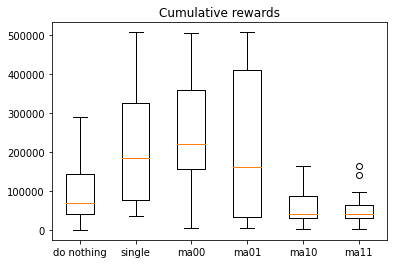

In [96]:
import matplotlib.pyplot as plt
box_names = [
    'do nothing',
    'single', 
    'ma00',
    'ma01',
    'ma10',
    'ma11'
]

plt.boxplot([
    results_do_nothing['cumulative_reward'],
    results_simple['cumulative_reward'], 
    results_ma00['cumulative_reward'],#results_ma00['cumulative_reward'],
    results_ma01['cumulative_reward'],
    results_ma10['cumulative_reward'],
    results_ma11['cumulative_reward'],
])
plt.xticks(range(1, len(box_names)+1), box_names)
plt.title("Cumulative rewards")
plt.savefig("cumrewards.png")


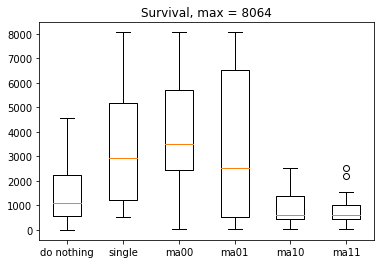

In [87]:
import matplotlib.pyplot as plt
box_names = [
    'do nothing',
    'single', 
    'ma00',
    'ma01',
    'ma10',
    'ma11'
]

plt.boxplot([
    results_do_nothing['episode_len'],
    results_simple['episode_len'], 
    results_ma00  ['episode_len'],
    results_ma01  ['episode_len'],
    results_ma10  ['episode_len'],
    results_ma11  ['episode_len'],
])
plt.xticks(range(1, len(box_names)+1), box_names)
plt.title("Survival, max = 8064")
plt.savefig('survival.png')
plt.show()

[99081.11371002198, 224529.234375, 254949.63532714843, 228133.6811035156, 55185.06352539062, 52388.38098144531]


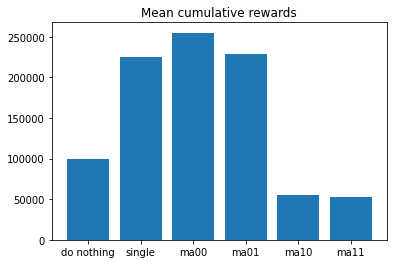

In [101]:
means = []
means.append(np.mean(results_do_nothing['cumulative_reward']))
means.append(np.mean(results_simple['cumulative_reward']) )
means.append(np.mean(results_ma00  ['cumulative_reward']))
means.append(np.mean(results_ma01  ['cumulative_reward']))
means.append(np.mean(results_ma10  ['cumulative_reward']))
means.append(np.mean(results_ma11  ['cumulative_reward']))
print(means)
plt.title("Mean cumulative rewards")
plt.bar(box_names, means)
plt.savefig("meansr.png")
